In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import preprocessing

In [2]:
dataset = pd.DataFrame(pd.read_csv('all.csv'))
raw_match = pd.DataFrame(pd.read_csv('match_data_version1.csv'))

In [3]:
match=raw_match[(raw_match["gameMode"]=="CLASSIC") & (raw_match["gameDuration"]>=1200)]


In [4]:
match.drop(match.index[[47110,50641]],axis=0,inplace=True)
duration_temp = np.array(match['gameDuration'])
duration = np.repeat(duration_temp, 10)
duration = pd.DataFrame(duration,columns=['Duration'])
dataset = pd.concat([dataset,duration],axis = 1)
dataset

/Users/zxg/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,participantId,teamId,championId,participantId.1,win,kills,deaths,assists,largestKillingSpree,largestMultiKill,...,firstBloodKill,firstBloodAssist,firstTowerKill,firstTowerAssist,combatPlayerScore,objectivePlayerScore,totalPlayerScore,totalScoreRank,lane,Duration
0,1,100,7,1,0,3,6,3,2,1,...,1,0,0,0,0,0,0,0,2,1323.0
1,2,100,350,2,0,0,6,10,0,0,...,0,0,0,0,0,0,0,0,2,1323.0
2,3,100,266,3,0,4,5,2,2,1,...,0,0,0,0,0,0,0,0,1,1323.0
3,4,100,517,4,0,4,7,4,2,2,...,0,0,0,0,0,0,0,0,4,1323.0
4,5,100,110,5,0,4,7,3,3,1,...,0,0,0,0,0,0,0,0,3,1323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687665,6,200,432,6,0,2,8,19,0,1,...,0,0,0,0,0,0,0,0,3,2090.0
687666,7,200,39,7,0,4,4,7,3,1,...,1,0,0,0,0,0,0,0,1,2090.0
687667,8,200,68,8,0,8,5,14,6,1,...,0,0,0,0,0,0,0,0,2,2090.0
687668,9,200,429,9,0,7,5,12,5,3,...,0,0,1,0,0,0,0,0,3,2090.0


In [5]:
dataset['PerDamgeDealt'] = dataset['totalDamageDealt']/dataset['Duration']
dataset['PerDamgeTaken'] = dataset['totalDamageTaken']/dataset['Duration']
dataset['PerdamageSelfMitigated'] = dataset['damageSelfMitigated']/dataset['Duration']
dataset['PertotalHeal'] = dataset['totalHeal']/dataset['Duration']




In [6]:
dataset['totalDamageDealt']

0          71369
1          11569
2          83332
3          92237
4          78732
           ...  
687665     32509
687666    135259
687667    131350
687668    179274
687669    218046
Name: totalDamageDealt, Length: 687670, dtype: int64

In [7]:
none_raw = dataset[dataset['lane'].isin([0])]
top_raw = dataset[dataset['lane'].isin([1])]
middle_raw = dataset[dataset['lane'].isin([2])]
bottom_raw = dataset[dataset['lane'].isin([3])]
jungle_raw = dataset[dataset['lane'].isin([4])]

In [8]:
none = none_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]
top = top_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]
middle = middle_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]
bottom = bottom_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]
jungle = jungle_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]

In [9]:
none = none.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
top = top.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
middle = middle.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
bottom = bottom.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
jungle = jungle.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))

In [10]:
none_kmeans = KMeans(n_clusters =7, random_state=0).fit(none)
top_kmeans = KMeans(n_clusters =7, random_state=0).fit(top)
middle_kmeans = KMeans(n_clusters =7, random_state=0).fit(middle)
bottom_kmeans = KMeans(n_clusters =7, random_state=0).fit(bottom)
jungle_kmeans = KMeans(n_clusters =7, random_state=0).fit(jungle)

In [11]:
print(none_kmeans.cluster_centers_)
print(top_kmeans.cluster_centers_)
print(middle_kmeans.cluster_centers_)
print(bottom_kmeans.cluster_centers_)
print(jungle_kmeans.cluster_centers_)

[[0.08105844 0.14995997 0.19049669 0.12820513 0.68055556]
 [0.44126335 0.5790698  0.52069031 0.55897436 0.26851852]
 [0.47412704 0.27011667 0.18217525 0.58241758 0.33134921]
 [0.10206101 0.23183699 0.17567279 0.04029304 0.21428571]
 [0.34430418 0.51592272 0.47424499 0.1025641  0.11522634]
 [0.15009835 0.33498405 0.63491301 0.15384615 0.6010101 ]
 [0.33942514 0.28474255 0.17728076 0.2120075  0.13821138]]
[[0.28651106 0.37283215 0.207398   0.10736625 0.13457602]
 [0.38454369 0.30300957 0.14200252 0.21834977 0.28272062]
 [0.30279744 0.42011628 0.32796464 0.1570821  0.36115615]
 [0.41132598 0.41643387 0.24610537 0.32011438 0.17387982]
 [0.35877661 0.26678119 0.12221953 0.15666675 0.11394945]
 [0.23103347 0.25670305 0.13723583 0.08991684 0.31420284]
 [0.23568629 0.25430836 0.11052311 0.05792816 0.07796235]]
[[0.28256903 0.27000746 0.08095431 0.08685577 0.08871188]
 [0.35126256 0.29367851 0.10481345 0.16133438 0.29824388]
 [0.45740976 0.26417596 0.09382972 0.15549578 0.13102074]
 [0.50019706

In [12]:
top_center = pd.DataFrame(top_kmeans.cluster_centers_)
middle_center = pd.DataFrame(middle_kmeans.cluster_centers_)
bottom_center = pd.DataFrame(bottom_kmeans.cluster_centers_)
jungle_center = pd.DataFrame(jungle_kmeans.cluster_centers_)
top_center.columns = ['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']
middle_center.columns = ['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']
bottom_center.columns = ['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']
jungle_center.columns = ['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']
top_center

,PerDamgeDealt,PerDamgeTaken,PerdamageSelfMitigated,kills,assists
0,0.286511,0.372832,0.207398,0.107366,0.134576
1,0.384544,0.303010,0.142003,0.218350,0.282721
2,0.302797,0.420116,0.327965,0.157082,0.361156
3,0.411326,0.416434,0.246105,0.320114,0.173880
4,0.358777,0.266781,0.122220,0.156667,0.113949
5,0.231033,0.256703,0.137236,0.089917,0.314203
6,0.235686,0.254308,0.110523,0.057928,0.077962


In [13]:
middle_center

,PerDamgeDealt,PerDamgeTaken,PerdamageSelfMitigated,kills,assists
0,0.282569,0.270007,0.080954,0.086856,0.088712
1,0.351263,0.293679,0.104813,0.161334,0.298244
2,0.457410,0.264176,0.093830,0.155496,0.131021
3,0.500197,0.424174,0.181820,0.370426,0.202504
4,0.343779,0.302286,0.095159,0.292447,0.149813
5,0.346220,0.438115,0.191137,0.143491,0.149973
6,0.087433,0.237393,0.118151,0.064459,0.291636


In [14]:
bottom_center

,PerDamgeDealt,PerDamgeTaken,PerdamageSelfMitigated,kills,assists
0,0.048505,0.202573,0.081107,0.038140,0.136873
1,0.288358,0.259354,0.091967,0.143340,0.176333
2,0.062013,0.375884,0.293547,0.063530,0.353339
3,0.056442,0.323258,0.182064,0.054074,0.171345
4,0.058095,0.230367,0.105770,0.057046,0.345647
5,0.336724,0.352618,0.137239,0.268905,0.192433
6,0.209892,0.257928,0.075625,0.070567,0.079991


In [15]:
jungle_center

,PerDamgeDealt,PerDamgeTaken,PerdamageSelfMitigated,kills,assists
0,0.222300,0.263901,0.093297,0.090397,0.253967
1,0.329017,0.360773,0.150540,0.365492,0.259190
2,0.260283,0.372504,0.153241,0.137186,0.214972
3,0.310205,0.287231,0.102955,0.197488,0.332719
4,0.245815,0.351767,0.175105,0.148184,0.472192
5,0.223763,0.273266,0.088983,0.079224,0.092796
6,0.301779,0.283322,0.096398,0.213769,0.149289


In [16]:
none_index = pd.DataFrame({'index':none_kmeans.labels_})
top_index = pd.DataFrame({'index':top_kmeans.labels_})
middle_index = pd.DataFrame({'index':middle_kmeans.labels_})
bottom_index = pd.DataFrame({'index':bottom_kmeans.labels_})
jungle_index = pd.DataFrame({'index':jungle_kmeans.labels_})

In [17]:
none_index.index = none.index
top_index.index = top.index
middle_index.index = middle.index
bottom_index.index = bottom.index
jungle_index.index = jungle.index

In [18]:
none_final = pd.concat([none, none_index], axis=1)
top_final = pd.concat([top, top_index], axis=1)
middle_final = pd.concat([middle, middle_index], axis=1)
bottom_final = pd.concat([bottom, bottom_index], axis=1)
jungle_final = pd.concat([jungle, jungle_index], axis=1)

In [19]:
raw_gameId = np.array(match['gameId'])
gameId = np.repeat(raw_gameId, 10)
temp = pd.DataFrame({'gameId':gameId})
all_index = pd.concat([none_index,top_index,middle_index,bottom_index,jungle_index])
final_index = pd.concat([dataset,all_index,temp],axis=1,ignore_index=False)


In [20]:
all_index['index'][pd.isna(all_index)['index']]
breif = final_index[['win','lane','index','gameId']]
breif = np.array(breif)
store = np.empty([68767*2,7])
for i in range(0,len(breif),5):
    store[int(i/5)][0] = breif[i][3]
    store[int(i/5)][1] = breif[i][0]
    store[int(i/5)][2] = breif[i][1]*10+breif[i][2]
    store[int(i/5)][3] = breif[i+1][1]*10+breif[i+1][2]
    store[int(i/5)][4] = breif[i+2][1]*10+breif[i+2][2]
    store[int(i/5)][5] = breif[i+3][1]*10+breif[i+3][2]
    store[int(i/5)][6] = breif[i+4][1]*10+breif[i+4][2]
breif_final = pd.DataFrame(store)
breif_final[(breif_final[2]>=10) & (breif_final[3]>=10) & (breif_final[4]>=10) & (breif_final[5]>=10) & (breif_final[6]>=10)]
breif_final.columns = ["Gameid","win","player1","player2","player3","player4","player5"]
print(breif_final['Gameid'])
breif_final['Gameid'] = breif_final['Gameid'].astype(int)
breif_final.to_csv('breif_final.csv',index=True)
    
        


0         4.247263e+09
1         4.247263e+09
2         4.247156e+09
3         4.247156e+09
4         4.241678e+09
              ...     
137529    4.170286e+09
137530    4.130964e+09
137531    4.130964e+09
137532    4.119954e+09
137533    4.119954e+09
Name: Gameid, Length: 137534, dtype: float64


top
1
2
3
4
5
6
7
8
9
10


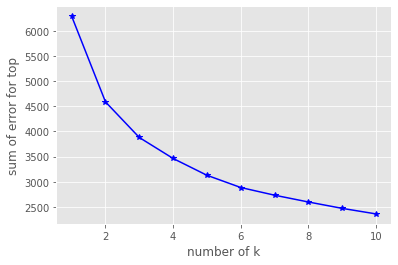

middle
1
2
3
4
5
6
7
8
9
10


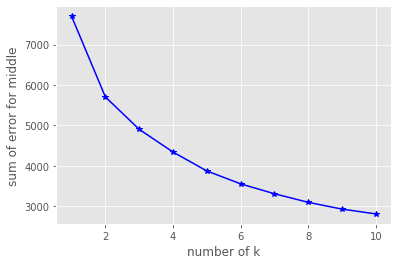

bottom
1
2
3
4
5
6
7
8
9
10


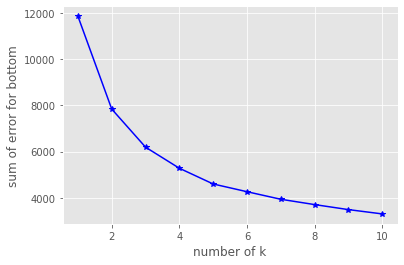

jungle
1
2
3
4
5
6
7
8
9
10


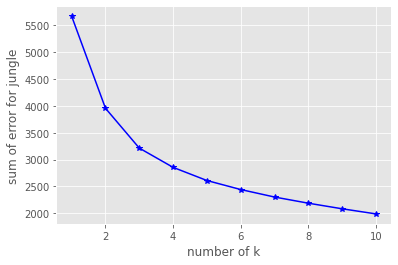

In [21]:
import matplotlib.pyplot as plt
def k_SSE(X, clusters,lane):
    K = range(1,clusters+1)
    TSSE = []
    print(str(lane))
    for k in K:

        print(k)
        SSE = []
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        for label in set(labels):
            SSE.append(np.sum((X.loc[labels == label,]-centers[label,:])**2))
        TSSE.append(np.sum(SSE))
    plt.style.use('ggplot')
    plt.plot(K, TSSE, 'b*-')
    plt.xlabel('number of k')
    plt.ylabel('sum of error for '+lane)
    plt.show()
k_SSE(top, 10,'top')
k_SSE(middle, 10,'middle')
k_SSE(bottom, 10,'bottom')
k_SSE(jungle, 10,'jungle')

In [23]:
example = pd.read_csv('real_example.csv')
example_data = example[['per damage dealt','per damage taken','per damage self mitigated','kills','assists']]
example_data.columns = ['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']
example_data.astype(int)

example_data = example_data.astype(int)
pd.DataFrame(example_data.loc[0]).T

,PerDamgeDealt,PerDamgeTaken,PerdamageSelfMitigated,kills,assists
0,99,11,11,9,13


In [24]:
example

,Unnamed: 0,kills,assists,per damage taken,per damage dealt,per damage self mitigated,Lane
0,player1,9,13,11.21,99.10,11.47,2
1,player2,4,22,16.30,16.37,16.49,3
2,player3,12,9,14.55,116.92,16.15,4
3,player4,2,7,11.13,67.51,6.88,1
4,player5,13,14,10.41,114.21,7.82,3


In [25]:
none = none_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]
top = top_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]
middle = middle_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]
bottom = bottom_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]
jungle = jungle_raw[['PerDamgeDealt','PerDamgeTaken','PerdamageSelfMitigated','kills','assists']]
new_top = top.append(pd.DataFrame(example_data.loc[3]).T)
new_middle = middle.append(pd.DataFrame(example_data.loc[0]).T)
new_bottom = bottom.append(pd.DataFrame(example_data.loc[1]).T)
new_bottom = new_bottom.append(pd.DataFrame(example_data.loc[4]).T)
new_jungle = jungle.append(pd.DataFrame(example_data.loc[2]).T)

In [26]:
top

,PerDamgeDealt,PerDamgeTaken,PerdamageSelfMitigated,kills,assists
2,62.987150,17.598639,13.669690,4,2
8,67.947846,15.952381,7.443689,6,11
14,73.838269,13.776006,15.370539,2,8
16,91.794229,10.834472,5.765376,2,2
18,84.305239,20.129081,14.334093,3,2
...,...,...,...,...,...
687635,73.884681,13.470888,11.469757,13,6
687642,115.131876,13.943583,10.346968,6,11
687658,66.176813,13.210492,10.606218,2,0
687664,35.160766,10.284689,6.990431,3,22


In [27]:
new_top

,PerDamgeDealt,PerDamgeTaken,PerdamageSelfMitigated,kills,assists
2,62.987150,17.598639,13.669690,4,2
8,67.947846,15.952381,7.443689,6,11
14,73.838269,13.776006,15.370539,2,8
16,91.794229,10.834472,5.765376,2,2
18,84.305239,20.129081,14.334093,3,2
...,...,...,...,...,...
687642,115.131876,13.943583,10.346968,6,11
687658,66.176813,13.210492,10.606218,2,0
687664,35.160766,10.284689,6.990431,3,22
687666,64.717225,11.585167,8.384689,4,7


In [28]:

new_top = new_top.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
new_middle = new_middle.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
new_bottom = new_bottom.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
new_jungle = new_jungle.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))

In [29]:
middle_predict = 20 + middle_kmeans.predict(pd.DataFrame(new_middle.iloc[-1]).T)[0]
bottom_predict = 30 + bottom_kmeans.predict(pd.DataFrame(new_bottom.iloc[-1]).T)[0]
jungle_predict = 40 + jungle_kmeans.predict(pd.DataFrame(new_jungle.iloc[-1]).T)[0]
top_predict = 10 + top_kmeans.predict(pd.DataFrame(new_top.iloc[-1]).T)[0]
bottom_predict2 =30 +  bottom_kmeans.predict(pd.DataFrame(new_bottom.iloc[-1]).T)[0]

In [30]:
example_predict = pd.DataFrame(data= [[1,middle_predict, bottom_predict, jungle_predict, top_predict, bottom_predict2]],
             columns = ['win','player1', 'player2', 'player3', 'player4', 'player5'],
             index=[1])
example_predict.to_csv('example_predict.csv')


In [ ]:
ex